定义多臂老虎机环境

In [1]:
import numpy as np

class BernoulliBandit:
    def __init__(self, true_probs):
        self.true_probs = true_probs  # 每个臂的真实成功概率
        self.k = len(true_probs)
    
    def pull(self, arm):
        return np.random.rand() < self.true_probs[arm]  # 返回 0 或 1


 ε-Greedy
 我大多数时候只玩目前看起来赢得最多的机器，但我偶尔会冒险尝试一下其他的，也许我错过了隐藏的大宝藏！

In [2]:
def run_epsilon_greedy(bandit, steps, epsilon):
    k = bandit.k
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []

    for t in range(steps):
        if np.random.rand() < epsilon:
            a = np.random.randint(k)  # 探索
        else:
            a = np.argmax(Q)          # 利用

        r = bandit.pull(a)
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]  # 更新平均
        rewards.append(r)

    return np.cumsum(rewards)


UCB
虽然A机器现在赚得最多，但B机器我只玩过一两次，也许它其实更厉害？我得多试试它，心里才踏实。

In [3]:
def run_ucb1(bandit, steps):
    k = bandit.k
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []

    # 每个臂先试一次
    for a in range(k):
        r = bandit.pull(a)
        Q[a] = r
        N[a] = 1
        rewards.append(r)

    for t in range(k, steps):
        ucb = Q + np.sqrt(2 * np.log(t + 1) / N)
        a = np.argmax(ucb)
        r = bandit.pull(a)
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards.append(r)

    return np.cumsum(rewards)


Thompson Sampling
我不知道哪台机器最好，但我会根据目前的信心程度来试试看最有可能是赢家的那台。每赢一次，我对它就更有信心。

In [4]:
def run_thompson_sampling(bandit, steps):
    k = bandit.k
    alpha = np.ones(k)
    beta = np.ones(k)
    rewards = []

    for t in range(steps):
        theta = np.random.beta(alpha, beta)
        a = np.argmax(theta)
        r = bandit.pull(a)
        if r == 1:
            alpha[a] += 1
        else:
            beta[a] += 1
        rewards.append(r)

    return np.cumsum(rewards)


测试并可视化对比

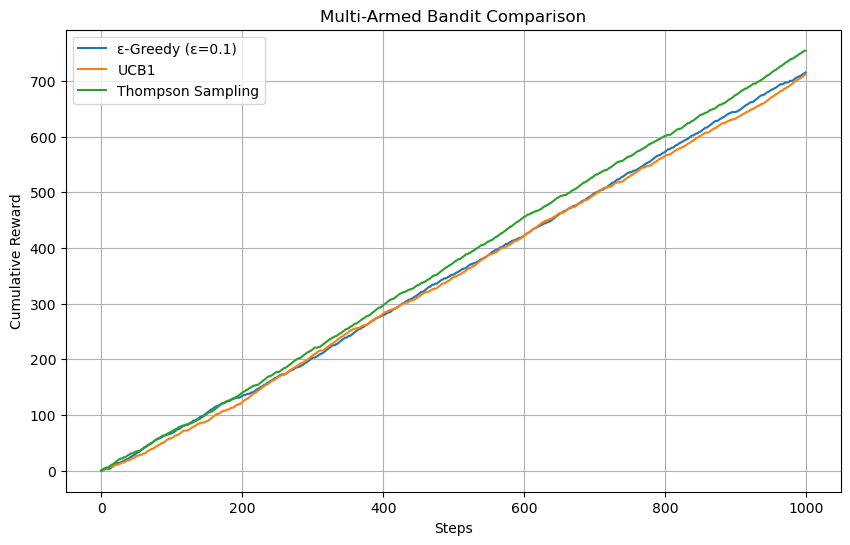

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(42)

true_probs = [0.2, 0.5, 0.75]  # 设置真实的中奖概率
bandit = BernoulliBandit(true_probs)
steps = 1000

r1 = run_epsilon_greedy(bandit, steps, epsilon=0.1)
bandit = BernoulliBandit(true_probs)  # 重置环境
r2 = run_ucb1(bandit, steps)
bandit = BernoulliBandit(true_probs)
r3 = run_thompson_sampling(bandit, steps)

plt.figure(figsize=(10, 6))
plt.plot(r1, label='ε-Greedy (ε=0.1)')
plt.plot(r2, label='UCB1')
plt.plot(r3, label='Thompson Sampling')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Multi-Armed Bandit Comparison')
plt.legend()
plt.grid(True)
plt.show()
